In [1]:
import Pkg
Pkg.activate(".")

"/home/mark/devel/InterpolatedRejectionSampling/Project.toml"

In [3]:
using InterpolatedRejectionSampling

In [4]:
using PyPlot

In [24]:
function somefunc(x,y)
    return sin(x)*y^2
end
function somedist(n1,n2)
    X = range(0, stop=π/2, length=n1)
    Y = range(0, stop=2, length=n2)
    Z = [somefunc(x,y) for x=X,y=Y]
    return X,Y,Z
end

somedist (generic function with 1 method)

In [25]:
X_highres, Y_highres, Z_highres = somedist(100,100);

View the 2d distribution

In [27]:
Xgrid = Matrix{Float64}(undef,size(Z_highres))
Ygrid = Matrix{Float64}(undef,size(Z_highres))
for (i,x) in enumerate(X_highres)
    for (j,y) in enumerate(Y_highres)
        Xgrid[i,j] = x
        Ygrid[i,j] = y
    end
end
;

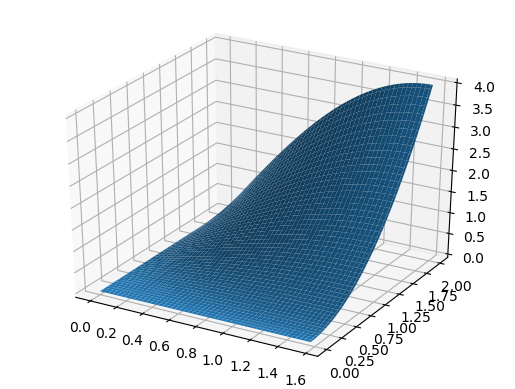

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7f7219901320>

In [28]:
plot_surface(Xgrid, Ygrid, Z_highres)

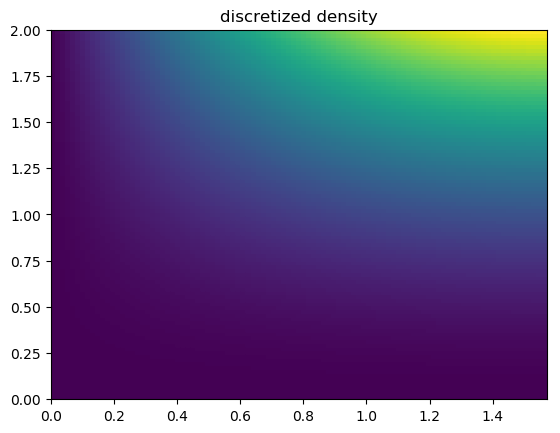

PyObject Text(0.5, 1.0, 'discretized density')

In [29]:
pcolormesh(Xgrid,Ygrid,Z_highres)
ax = gca()
ax.set_title("discretized density")

In [19]:
knots = (range(0, stop=π/2, length=10),
         range(0, stop=2, length=9));
vals = [somefunc(x,y) for x=knots[1],y=knots[2]]

10×9 Array{Float64,2}:
 0.0  0.0        0.0       0.0        …  0.0       0.0       0.0     
 0.0  0.010853   0.043412  0.0976771     0.390708  0.531798  0.694593
 0.0  0.0213763  0.085505  0.192386      0.769545  1.04744   1.36808 
 0.0  0.03125    0.125     0.28125       1.125     1.53125   2.0     
 0.0  0.0401742  0.160697  0.361568      1.44627   1.96854   2.57115 
 0.0  0.0478778  0.191511  0.4309     …  1.7236    2.34601   3.06418 
 0.0  0.0541266  0.216506  0.487139      1.94856   2.6522    3.4641  
 0.0  0.0587308  0.234923  0.528577      2.11431   2.87781   3.75877 
 0.0  0.0615505  0.246202  0.553954      2.21582   3.01597   3.93923 
 0.0  0.0625     0.25      0.5625        2.25      3.0625    4.0     

In [31]:
n = 100000
xy = irsample(X,Y,n)

2×100000 Array{Float64,2}:
 1.36572  0.669868  1.27513  0.673106  …  1.44555  1.3489    0.321448
 1.94319  0.945093  1.29158  1.05941      1.6762   0.115417  1.73894 

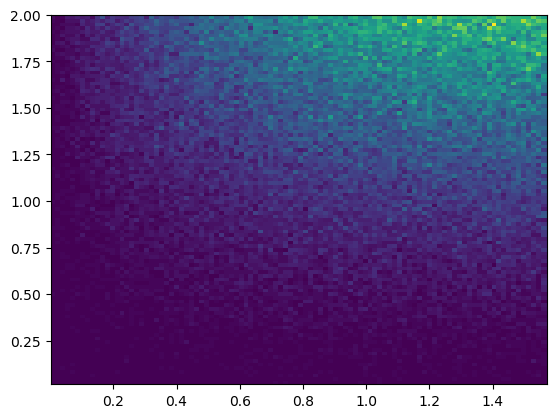

([0.0 0.0 … 1.0 2.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 52.0 45.0; 0.0 0.0 … 49.0 39.0], [0.00161287, 0.0173045, 0.0329961, 0.0486877, 0.0643793, 0.080071, 0.0957626, 0.111454, 0.127146, 0.142837  …  1.42955, 1.44524, 1.46093, 1.47662, 1.49232, 1.50801, 1.5237, 1.53939, 1.55508, 1.57077], [0.016193, 0.0360311, 0.0558691, 0.0757072, 0.0955452, 0.115383, 0.135221, 0.155059, 0.174897, 0.194735  …  1.82145, 1.84129, 1.86113, 1.88097, 1.90081, 1.92064, 1.94048, 1.96032, 1.98016, 2.0], PyObject <matplotlib.collections.QuadMesh object at 0x7f7219799208>)

In [32]:
hist2D(xy[1,:], xy[2,:],bins=100)